# ESILV - Python for data analysis - project 2022

## 1) Install and Import of Libraries

In [1]:
#Important librairies
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#Install packages
!pip install bokeh
!pip install xgboost
!brew install libomp

'brew' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [2]:
#Import for step 3
from sklearn.preprocessing import MinMaxScaler

#Import for step 4
from matplotlib import pyplot as plt
%matplotlib inline
from bokeh.plotting import figure, output_notebook, show
from bokeh.palettes import Turbo256
from bokeh.transform import linear_cmap
from bokeh.palettes import brewer
import seaborn as sns

#Import for step 5
import time
from decimal import *

#Import for step 6
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [3]:
#Load the Dataset
SeoulBikeDf = pd.read_csv("SeoulBikeData.csv", encoding="latin1")
#We display it
SeoulBikeDf.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## 2) Quick Analyze

 - Dataset : Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern.

 - Target : The good renter number of bike by hours.

In [4]:
#Display the dataset size
print('Number of columns : ' +  str(SeoulBikeDf.shape[1]))
print('Number of row : ' + str(SeoulBikeDf.shape[0]))

Number of columns : 14
Number of row : 8760


In [5]:
#Check the columns type
SeoulBikeDf.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [6]:
SeoulBikeDf.groupby("Date")["Rented Bike Count"].count()
#We have exactly 1 year of dataset because : 24 * 365 = 8760

Date
01/01/2018    24
01/02/2018    24
01/03/2018    24
01/04/2018    24
01/05/2018    24
              ..
31/05/2018    24
31/07/2018    24
31/08/2018    24
31/10/2018    24
31/12/2017    24
Name: Rented Bike Count, Length: 365, dtype: int64

## 3) Clear the dataset

In [7]:
#Check presence of null value in the dataframe
print ('Missing values in the dataset ? -> ' + str(SeoulBikeDf.isnull().values.any()))
print ('Improper values in the dataset ? -> ' + str(SeoulBikeDf.isna().values.any()))

Missing values in the dataset ? -> False
Improper values in the dataset ? -> False


In [8]:
#Convert quantitative variables into qualitative ones
print('Before conversion of Functioning Day : ' + str(SeoulBikeDf['Functioning Day'].unique()))
SeoulBikeDf['Functioning Day'] = SeoulBikeDf['Functioning Day'].replace(to_replace=['No', 'Yes'], value=[0, 1])
print('After conversion of Functioning Day : ' + str(SeoulBikeDf['Functioning Day'].unique()) + "\n")

print('Before conversion of Holiday : ' + str(SeoulBikeDf['Holiday'].unique()))
SeoulBikeDf['Holiday'] = SeoulBikeDf['Holiday'].replace(to_replace=['No Holiday', 'Holiday'], value=[0, 1])
print('After conversion of Holiday : ' + str(SeoulBikeDf['Holiday'].unique()) + "\n")

print('Before conversion of Seasons : ' + str(SeoulBikeDf['Seasons'].unique()))
SeoulBikeDf['Seasons'] = SeoulBikeDf['Seasons'].replace(to_replace=['Winter', 'Spring', 'Summer', 'Autumn'], value=[0, 1, 2, 3])
print('After conversion of Season : ' + str(SeoulBikeDf['Seasons'].unique()) + "\n")

Before conversion of Functioning Day : ['Yes' 'No']
After conversion of Functioning Day : [1 0]

Before conversion of Holiday : ['No Holiday' 'Holiday']
After conversion of Holiday : [0 1]

Before conversion of Seasons : ['Winter' 'Spring' 'Summer' 'Autumn']
After conversion of Season : [0 1 2 3]



In [9]:
#We split dates into 4 new columns :  day, month, years and dayofweek
SeoulBikeDf['Years'] = pd.to_datetime(SeoulBikeDf['Date']).dt.year
SeoulBikeDf['Month'] = pd.to_datetime(SeoulBikeDf['Date']).dt.month
SeoulBikeDf['Day'] = pd.to_datetime(SeoulBikeDf['Date']).dt.day
SeoulBikeDf['Dayofweek'] = pd.to_datetime(SeoulBikeDf['Date']).dt.dayofweek

#Monday starting at 0 so we add + 1 at all the colomn
SeoulBikeDf['Dayofweek'] += 1 

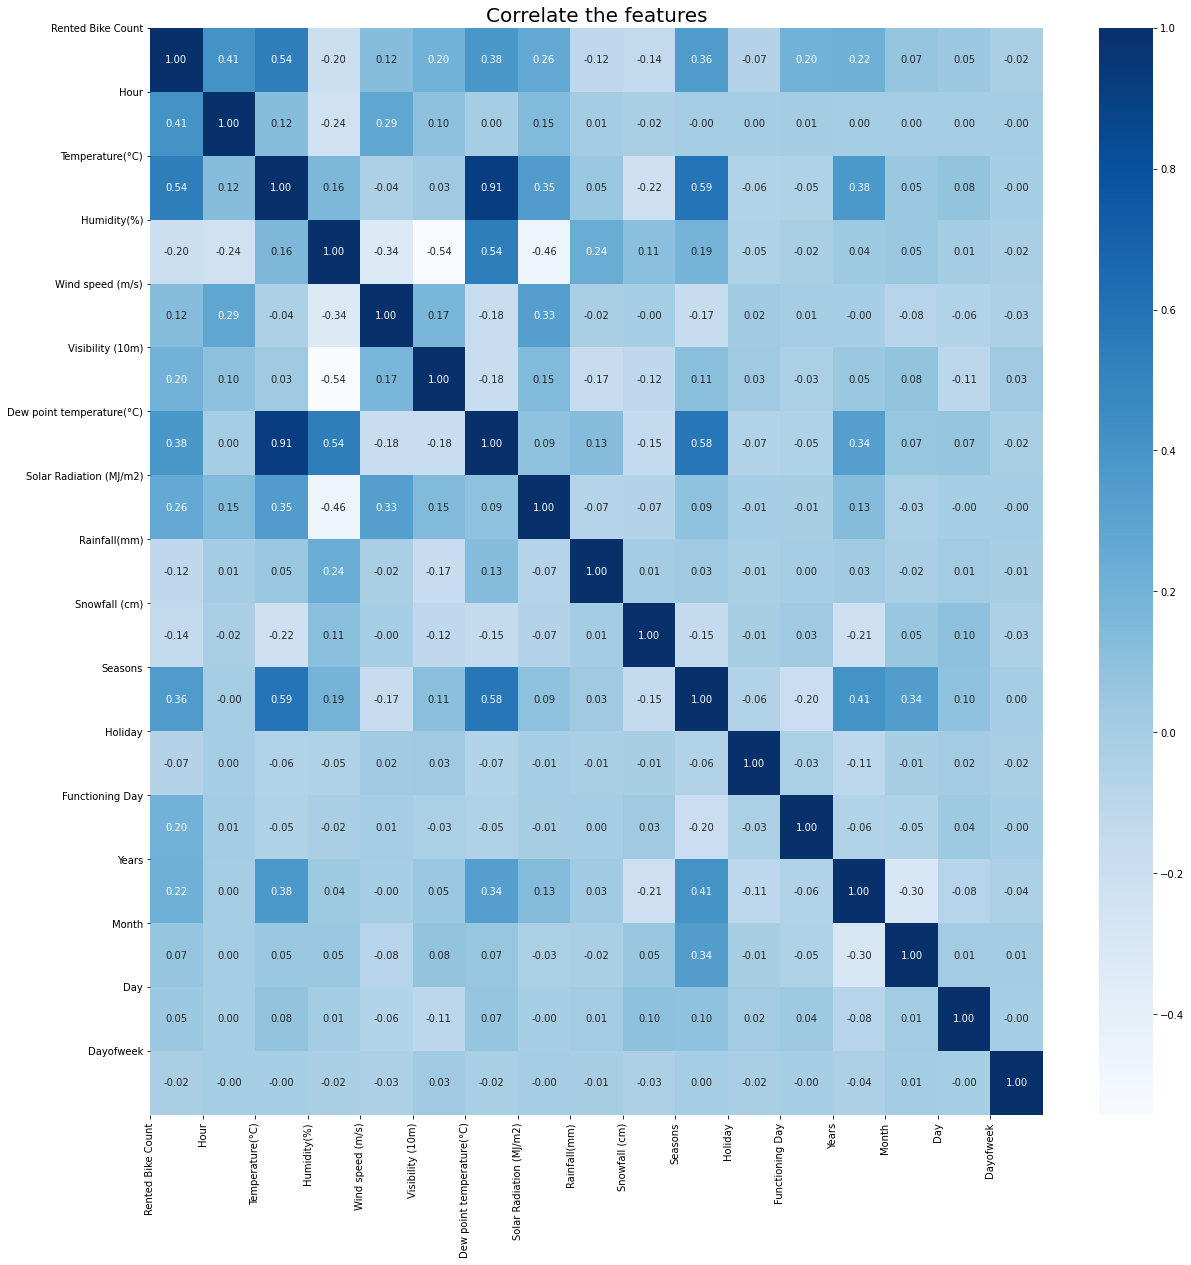

In [10]:
#Create Correlation Dataframe
corr = SeoulBikeDf.corr()

#Plot figsize and Generate Color Map
fig, ax = plt.subplots(figsize=(20, 20))
colormap = sns.diverging_palette(220, 10, as_cmap=True)

#Generate Heat Map, allow annotations and place floating values in map
sns.heatmap(corr, cmap="Blues", annot=True, fmt=".2f").set_title("Correlate the features",fontsize = 20)

#Apply ticks
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

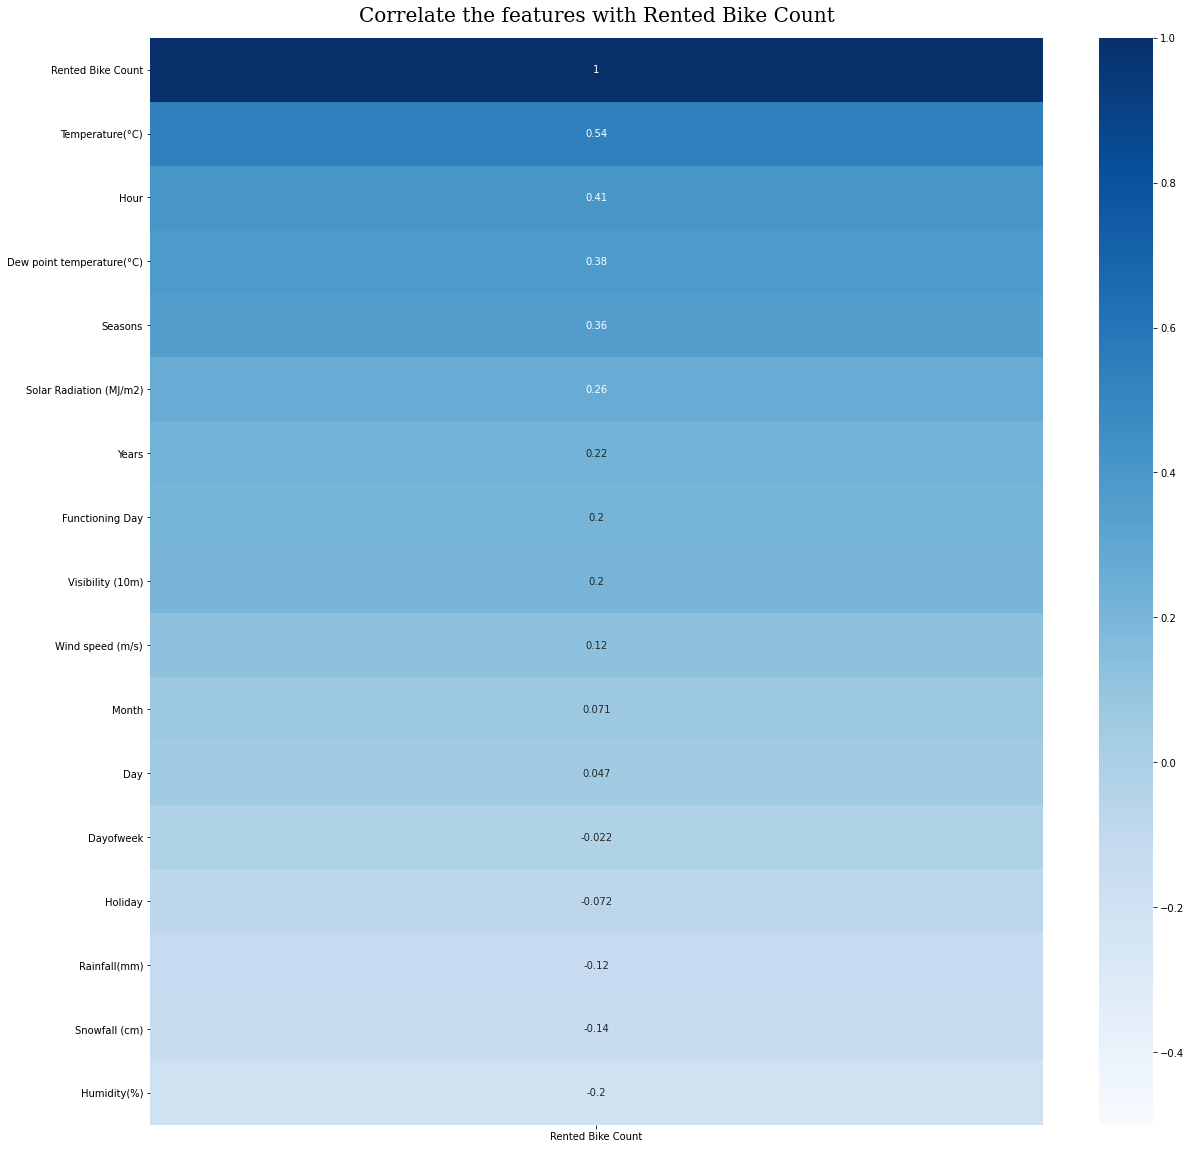

In [11]:
#We only focus on the target correlation
plt.figure(figsize=(20,20))
heatmap = sns.heatmap(SeoulBikeDf.corr()[['Rented Bike Count']].sort_values(by='Rented Bike Count', ascending=False), vmin=-0.5, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Correlate the features with Rented Bike Count', pad=16, fontdict={'family': 'serif','size': 20});

In [12]:
# Check min and max values for a potential scaling
col1 = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
col2 = [str(SeoulBikeDf['Temperature(°C)'].min()), str(SeoulBikeDf['Humidity(%)'].min()), str(SeoulBikeDf['Wind speed (m/s)'].min()), str(SeoulBikeDf['Visibility (10m)'].min()), str(SeoulBikeDf['Dew point temperature(°C)'].min()), str(SeoulBikeDf['Solar Radiation (MJ/m2)'].min()), str(SeoulBikeDf['Rainfall(mm)'].min()), str(SeoulBikeDf['Snowfall (cm)'].min())]
col3 = [str(SeoulBikeDf['Temperature(°C)'].max()), str(SeoulBikeDf['Humidity(%)'].max()), str(SeoulBikeDf['Wind speed (m/s)'].max()), str(SeoulBikeDf['Visibility (10m)'].max()), str(SeoulBikeDf['Dew point temperature(°C)'].max()), str(SeoulBikeDf['Solar Radiation (MJ/m2)'].max()), str(SeoulBikeDf['Rainfall(mm)'].max()), str(SeoulBikeDf['Snowfall (cm)'].max())]
SeoulBikeDfMinMax = pd.DataFrame({'Name': col1, 'Min': col2, 'Max': col3})
SeoulBikeDfMinMax

,Name,Min,Max
0,Temperature(°C),-17.8,39.4
1,Humidity(%),0,98
2,Wind speed (m/s),0.0,7.4
3,Visibility (10m),27,2000
4,Dew point temperature(°C),-30.6,27.2
5,Solar Radiation (MJ/m2),0.0,3.52
6,Rainfall(mm),0.0,35.0
7,Snowfall (cm),0.0,8.8


In [13]:
# We decided to test various approaches with different datasets
# First attempt is using the qualitative raw data
SeoulBikeDf1 = SeoulBikeDf.copy().drop(['Date', 'Dayofweek'], axis = 1)

# Second attempt is using years and the dew temperature
SeoulBikeDf2 = SeoulBikeDf.copy().drop(['Date', 'Dew point temperature(°C)','Years'], axis = 1)

# Third attempt is using bad correlation columns
SeoulBikeDf3 = SeoulBikeDf2.copy()
SeoulBikeDf3 = SeoulBikeDf3.drop(['Humidity(%)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday'], axis = 1)

# Fourth attempt have a new column which scales the visibility
SeoulBikeDf4 = SeoulBikeDf3.copy()
SeoulBikeDf4_scaled = MinMaxScaler().fit_transform(SeoulBikeDf4.to_numpy())
SeoulBikeDf4_scaled = pd.DataFrame(SeoulBikeDf4_scaled, columns=['Rented Bike Count','Hour','Temperature(°C)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Seasons','Functioning Day','Month','Day','Dayofweek'])
SeoulBikeDf4['Visibility (10m)'] = SeoulBikeDf4_scaled['Visibility (10m)']

# Last attempt remplaces the weather data by an integer representing the type
SeoulBikeDf5 = SeoulBikeDf2.copy()
# Rainfall and Snowfall is set to 1 if they is water on the ground
SeoulBikeDf5['Rainfall(mm)'] = SeoulBikeDf5['Rainfall(mm)'].apply(lambda x: 1 if x > 0 else 0)
SeoulBikeDf5['Snowfall (cm)'] = SeoulBikeDf5['Snowfall (cm)'].apply(lambda x: 1 if x > 0 else 0)
# Humidity based on information founded on monexpert-renovation-energie.fr/
SeoulBikeDf5.loc[SeoulBikeDf5['Humidity(%)'] <= 20, 'Humidity(%)'] = 0
SeoulBikeDf5.loc[SeoulBikeDf5['Humidity(%)'] >= 50, 'Humidity(%)'] = 2
SeoulBikeDf5.loc[SeoulBikeDf5['Humidity(%)'] < 2, 'Humidity(%)'] = 1
# Visibility based on information founded on alarmemeteo.ch
SeoulBikeDf5.loc[SeoulBikeDf5['Visibility (10m)'] <= 40, 'Visibility (10m)'] = 0
SeoulBikeDf5.loc[SeoulBikeDf5['Visibility (10m)'] >= 80, 'Visibility (10m)'] = 2
SeoulBikeDf5.loc[SeoulBikeDf5['Visibility (10m)'] < 2, 'Visibility (10m)'] = 1
# Convert Wind Speed to the Beaufort scale
SeoulBikeDf5['Wind speed (m/s)'] = SeoulBikeDf5['Wind speed (m/s)'].apply(lambda x: 1 if x >= 3.3 else 0)
# Rename columns
SeoulBikeDf5 = SeoulBikeDf5.rename({'Rainfall(mm)': 'Rainfall', 'Snowfall (cm)': 'Snowfall', 'Humidity(%)': 'Humidity', 'Visibility (10m)': 'Visibility', 'Wind speed (m/s)': 'Wind speed'}, axis=1)

## 4) Data-visualization

In [14]:
# We group by Month and Hour for scattler plotting
dfMonth = SeoulBikeDf.groupby('Month').agg({'Rented Bike Count': ['sum'], 'Temperature(°C)': ['mean'], 'Humidity(%)': ['mean'], 'Wind speed (m/s)': ['mean'], 'Visibility (10m)': ['mean'], 'Dew point temperature(°C)': ['mean'], 'Solar Radiation (MJ/m2)': ['mean'], 'Rainfall(mm)': ['mean'], 'Snowfall (cm)': ['mean'], 'Seasons': ['mean'], 'Holiday': ['mean'], 'Functioning Day': ['mean']})
dfHour = SeoulBikeDf.groupby('Hour').agg({'Rented Bike Count': ['sum'], 'Temperature(°C)': ['mean'], 'Humidity(%)': ['mean'], 'Wind speed (m/s)': ['mean'], 'Visibility (10m)': ['mean'], 'Dew point temperature(°C)': ['mean'], 'Solar Radiation (MJ/m2)': ['mean'], 'Rainfall(mm)': ['mean'], 'Snowfall (cm)': ['mean'], 'Seasons': ['mean'], 'Holiday': ['mean'], 'Functioning Day': ['mean']})

dfHour.head()
dfMonth

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
,sum,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Month,,,,,,,,,,,,
1,287244,2.722849,52.931452,1.813038,1392.811828,-6.599059,0.355175,0.121371,0.250269,0.580645,0.096774,1.000000
2,264112,6.484375,51.785714,1.838393,1451.800595,-3.832143,0.510818,0.149702,0.066518,0.642857,0.107143,0.964286
3,455037,11.436694,59.829301,1.913844,1241.911290,3.104570,0.595403,0.094220,0.002957,1.193548,0.032258,0.967742
4,556219,13.711250,53.630556,1.852639,1440.533333,3.188889,0.733667,0.149583,0.000000,1.200000,0.000000,0.966667
5,665948,16.620296,60.740591,1.759409,1348.532258,8.294624,0.688911,0.290323,0.000000,1.193548,0.032258,1.000000
6,706728,18.998194,65.637500,1.694583,1196.531944,11.730000,0.677778,0.359444,0.011944,1.800000,0.033333,0.956944
7,691339,23.125403,60.586022,1.664919,1527.458333,14.497446,0.777325,0.015054,0.013978,1.806452,0.000000,1.000000
8,614190,21.259140,62.998656,1.677151,1658.043011,13.169892,0.605296,0.324597,0.006048,1.806452,0.032258,1.000000


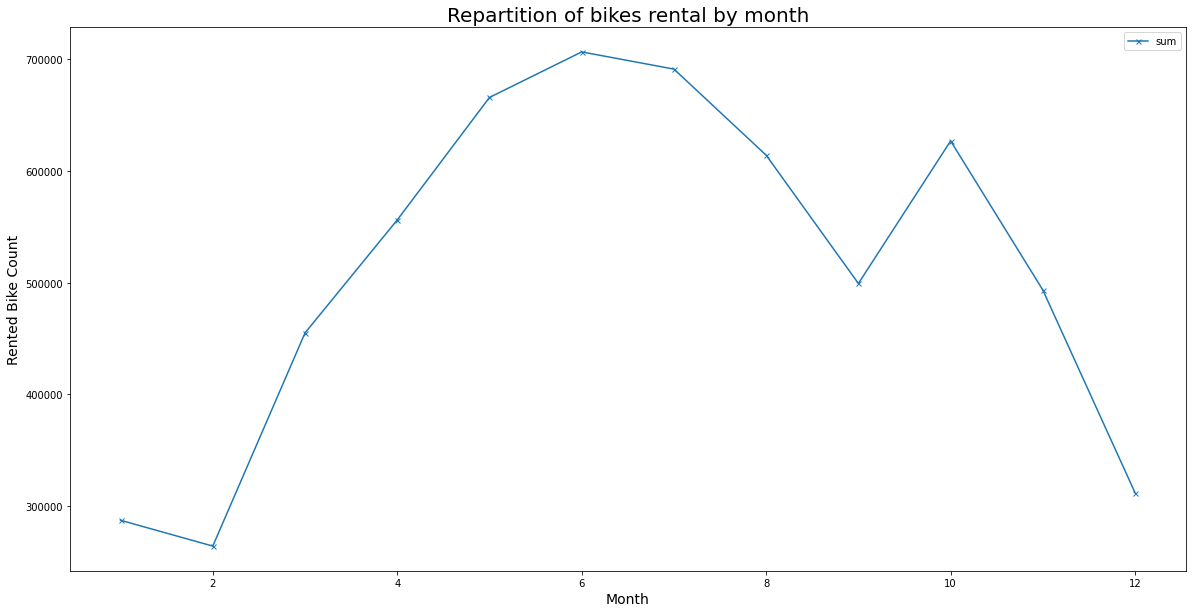

In [15]:
#Repartition of bikes rental by month
dfMonth.plot(y="Rented Bike Count", marker="x", markersize=5, figsize=(20,10));
plt.title("Repartition of bikes rental by month", fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Rented Bike Count', fontsize=14)
plt.show()

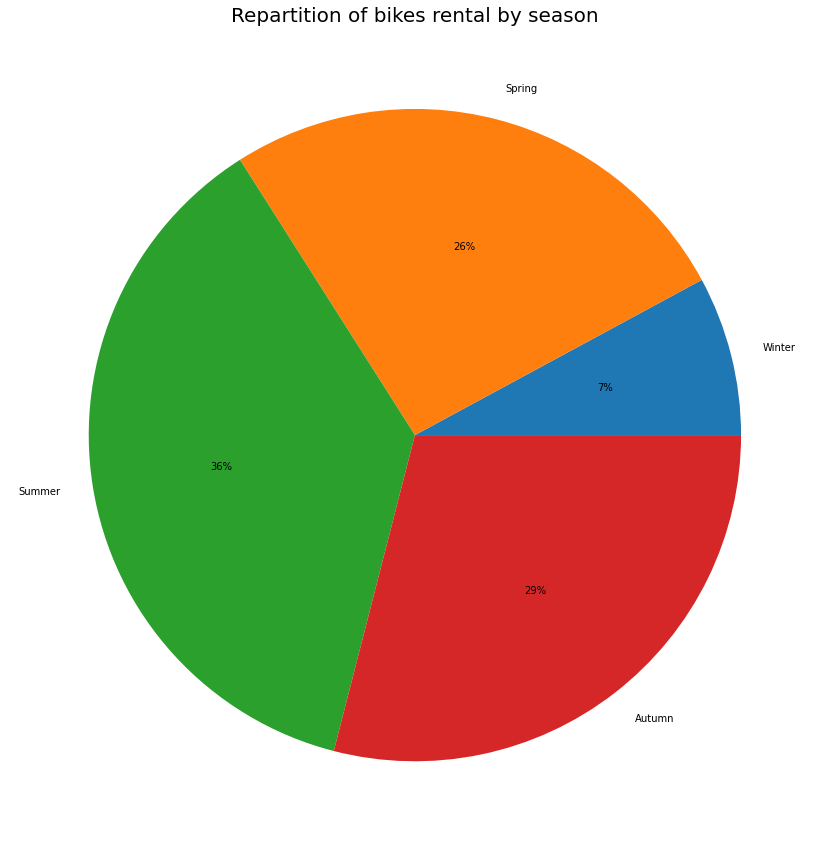

In [16]:
Winter=SeoulBikeDf[SeoulBikeDf["Seasons"]==0].sum()
Spring=SeoulBikeDf[SeoulBikeDf["Seasons"]==1].sum()
Summer=SeoulBikeDf[SeoulBikeDf["Seasons"]==2].sum()
Autumn=SeoulBikeDf[SeoulBikeDf["Seasons"]==3].sum()

BikeSeasons={"Winter":Winter["Rented Bike Count"],"Spring":Spring["Rented Bike Count"],"Summer":Summer["Rented Bike Count"],"Autumn":Autumn["Rented Bike Count"]}
plt.gcf().set_size_inches(15,15)
plt.pie(BikeSeasons.values(),labels=BikeSeasons.keys(), autopct='%1d%%');
plt.title("Repartition of bikes rental by season", fontsize=20)
plt.show()

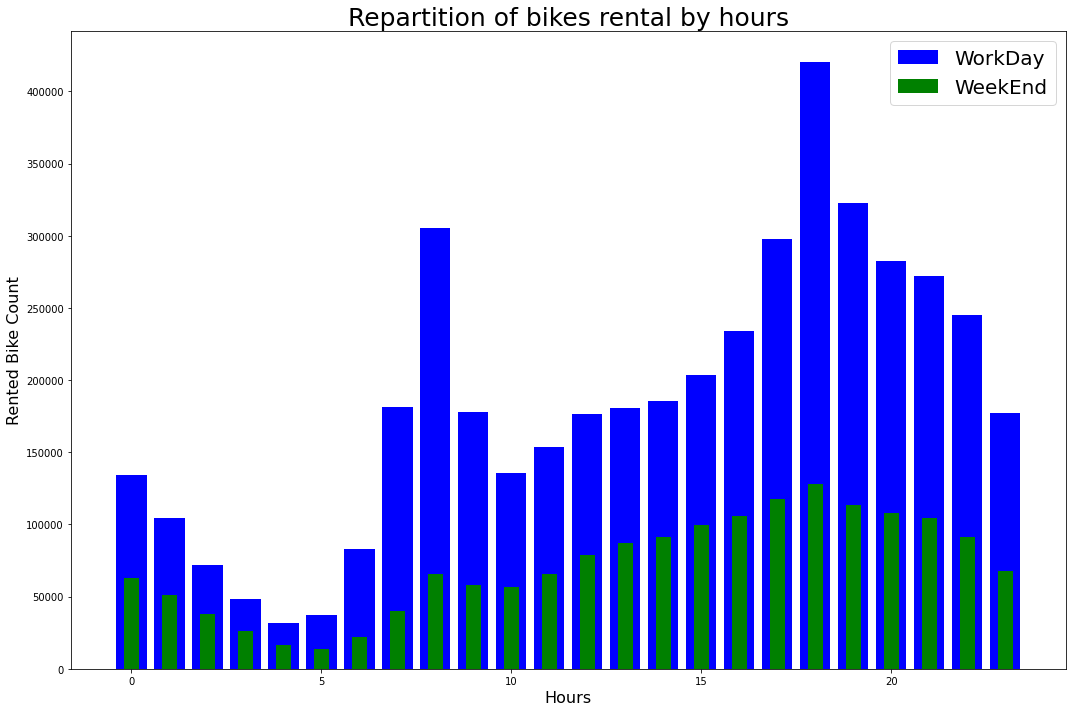

In [17]:
BikeHoursWorkDay={}
for k in range(24):
    BikeHoursWorkDay[k] = SeoulBikeDf[(SeoulBikeDf["Hour"] == k) & SeoulBikeDf["Dayofweek"].between(1, 5)].sum()["Rented Bike Count"]

BikeHoursWeekEnd={}
for k in range(24):
    BikeHoursWeekEnd[k] = SeoulBikeDf[(SeoulBikeDf["Hour"] == k) & SeoulBikeDf["Dayofweek"].between(6, 7)].sum()["Rented Bike Count"]
    
fig, ax = plt.subplots()
p1 = ax.bar(BikeHoursWorkDay.keys(), BikeHoursWorkDay.values(), color='b', label ="WorkDay")
p2 = ax.bar(BikeHoursWeekEnd.keys(), BikeHoursWeekEnd.values(), color='g', label ="WeekEnd", width= 0.4)
plt.gcf().set_size_inches(15,10)
plt.title("Repartition of bikes rental by hours", fontsize = 25)
plt.xlabel('Hours', fontsize = 16)
plt.ylabel('Rented Bike Count', fontsize = 16)
fig.tight_layout()
ax.legend(fontsize=20)
plt.show()

In [18]:
# Temperature rented bikes count
output_notebook() 
p = figure(plot_width = 950, plot_height = 400, title="Repartition of bikes rental by temperature", x_axis_label="Temperature(°C)", y_axis_label="Rented Bike Count") 
p.title.text_font_size = "25px"
p.xaxis.axis_label_text_font_size = "15pt"
p.yaxis.axis_label_text_font_size = "15pt"
dfTemp = SeoulBikeDf['Temperature(°C)'].astype(int)

# create linear color mapper
mapper = linear_cmap(field_name="x", palette=Turbo256, low=min(dfTemp), high=max(dfTemp))
p.vbar(x=dfTemp, top=SeoulBikeDf['Rented Bike Count'], width=0.5, bottom=0, color=mapper) 
show(p)

Loading BokehJS ...

In [19]:
# rented by weather
# create a new plot with a title and axis labels
p = figure(plot_width = 950, plot_height = 500,title="Action of weather conditions on rented bike", x_axis_label="x", y_axis_label="Rented Bike Count")
p.title.text_font_size = "25px"
p.xaxis.axis_label_text_font_size = "15pt"
p.yaxis.axis_label_text_font_size = "15pt"

# add weather condition
p.vbar(x = SeoulBikeDf['Wind speed (m/s)'].astype(int), top = SeoulBikeDf['Rented Bike Count'], legend_label="Wind speed (m/s)", color="blue", line_width=2)
p.vbar(x = SeoulBikeDf['Solar Radiation (MJ/m2)'].astype(int), top =  SeoulBikeDf['Rented Bike Count'], legend_label="Solar Radiation (MJ/m2)", color="red", line_width=2)
p.vbar(x = SeoulBikeDf['Rainfall(mm)'].astype(int), top =  SeoulBikeDf['Rented Bike Count'], legend_label="Rainfall(mm)", color="orange", line_width=2)
p.vbar(x = SeoulBikeDf['Snowfall (cm)'].astype(int), top =  SeoulBikeDf['Rented Bike Count'], legend_label="Snowfall (cm)", color="green", line_width=2)

# show the results
show(p)

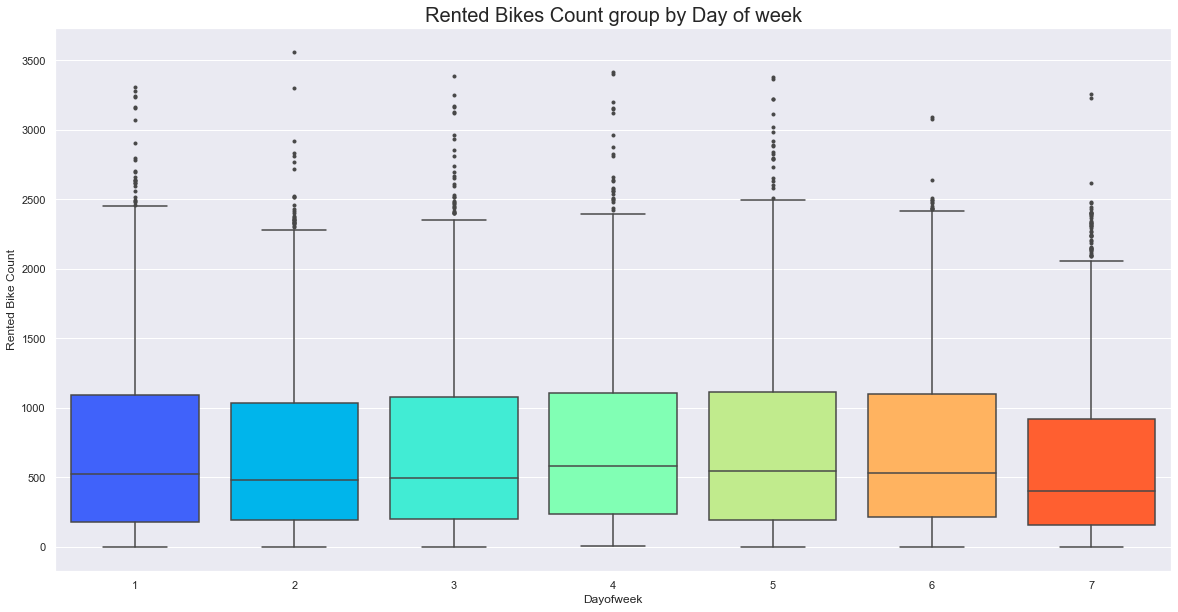

In [45]:
flierprops = dict(marker='o', markersize=3)
sns.boxplot(x="Dayofweek", y="Rented Bike Count",palette="rainbow", data=SeoulBikeDf,saturation=1,flierprops=flierprops).set_title("Rented Bikes Count group by Day of week",fontsize = 20)
sns.set(rc={'figure.figsize':(20,10)})

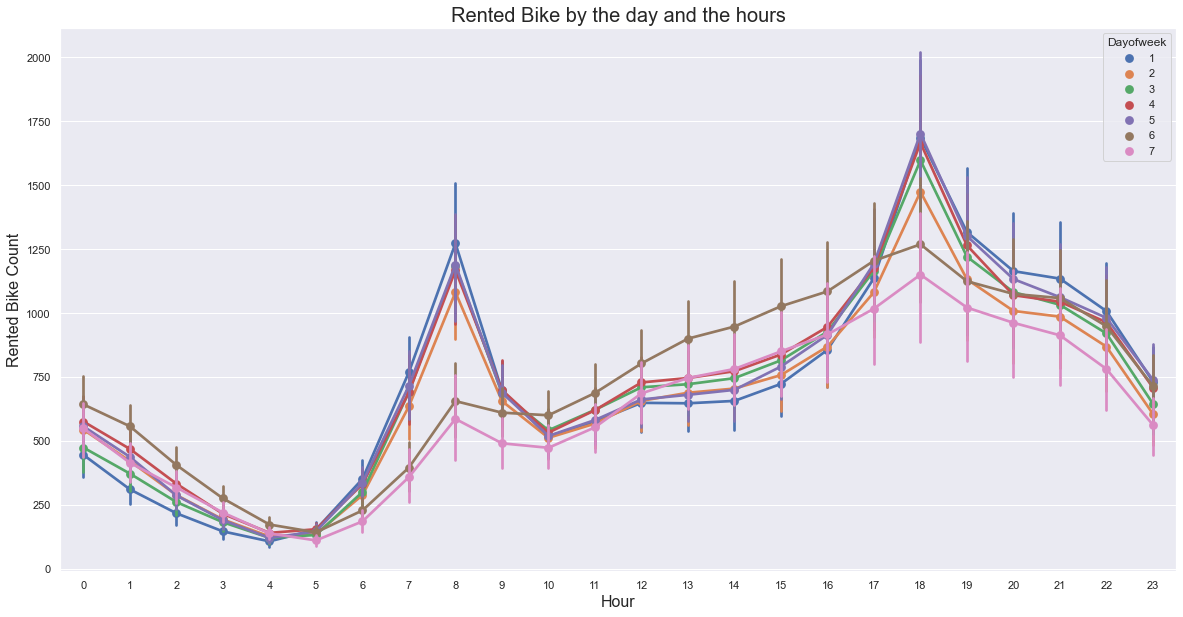

In [21]:
sns.pointplot(x = "Hour", y = "Rented Bike Count", hue = "Dayofweek", data=SeoulBikeDf)
plt.title("Rented Bike by the day and the hours", fontsize=20)
plt.xlabel('Hour', fontsize=16)
plt.ylabel('Rented Bike Count', fontsize=16)
plt.show()

## 5) Utils

In [22]:
# Function which returns the grid fitting
def GetScoreHyperparametres(algo, x, y, hyperparametres):
    grid = GridSearchCV(algo, hyperparametres, n_jobs=-1)
    grid.fit(x, y)
    ExactScore = round(grid.score(x,y) * 100,2)
    
    print('Best r2 accuracy for this model : ' + str(ExactScore) + '% with hyperparameters : ' + str(grid.best_estimator_))
    return grid , ExactScore

In [23]:
# Function for computing time for the scoring fitting and returning a tuple
def TimeOfModel(func,*args):
    start_time = time.time()
    return func(*args) , round(time.time() - start_time,3)

In [24]:
# For each model we display the r2 accuracy and we only store the best value
def BestModelWithoutTraining(namefunc, func):
    bestModel = 1
    bestModelTime = 0
    bestModelExactValue = 0
    incModel = 1
    
    for x in listFeatures:
        exactmodel = TimeOfModel(func, x, y)
        print(namefunc + 'Model ' + str(incModel) + ' r2 accuracy : ' + str(exactmodel[0]) + '% in ' + str(exactmodel[1]) + 'secondes')
        if(bestModelExactValue < exactmodel[0]):
                bestModel = incModel
                bestModelTime = exactmodel[1]
                bestModelExactValue = exactmodel[0]
        incModel = incModel + 1
    print("Best exact" + namefunc + " model is : " + str(bestModel) + " with " + str(bestModelExactValue) + '%')
    return [namefunc, str(bestModel), bestModelTime, bestModelExactValue]

In [25]:
# Function for taking the gridsearch on all models
def BestModelWithTraining(namefunc, func, algo, hyperparametres):
    bestModel = 1
    bestModelTime = 0
    bestModelExactValue = 0
    incModel = 1
    for i in listFeatures:
        print('Computing model ' + str(incModel) + ' in progress ...')
        x_train, x_test, y_train, y_test = train_test_split(i, y, test_size=0.33)
        
        #Scale
        scaler = StandardScaler()
        scaler.fit(x_train)       
        x_train = scaler.transform(x_train, copy = False)
        x_test  = scaler.transform(x_test, copy = False)
        
        #Find Model
        InfoModel , time = TimeOfModel(func, algo, x_train, y_train, hyperparametres)           
        
        #Save the best model
        if(bestModelExactValue < InfoModel[1]):
                bestModel = incModel
                bestModelTime = time
                bestModelExactValue = InfoModel[1]
        incModel = incModel + 1
    print("Best r2 accuracy " + namefunc + " model is : " + str(bestModel) + " with " + str(bestModelExactValue) + '%')
    return [namefunc, bestModel, bestModelTime, bestModelExactValue]

In [26]:
# Generate a dataframe or store the best model for each method
ResultDf = pd.DataFrame()
def StockResultDf(tab):
    global ResultDf
    df2 = {'Model Name': tab[0], 'Model Number': tab[1], 'Time(s)': tab[2], 'R2 Value (%)' : tab[3]}
    ResultDf = ResultDf.append(df2,ignore_index=True)

## 6) Data-visualization

For decide of the best models, we going to focus on the R2 value

In [27]:
# We split the target of features
# Target for first method
y = SeoulBikeDf1["Rented Bike Count"]

# Features
x1 = SeoulBikeDf1.drop(['Rented Bike Count'], axis = 1)
x2 = SeoulBikeDf2.drop(['Rented Bike Count'], axis = 1)
x3 = SeoulBikeDf3.drop(['Rented Bike Count'], axis = 1)
x4 = SeoulBikeDf4.drop(['Rented Bike Count'], axis = 1)
x5 = SeoulBikeDf5.drop(['Rented Bike Count'], axis = 1)

# Create list of features
listFeatures = [x1, x2, x3, x4, x5]

In [28]:
def KNN(x,y):
    KnnModel = KNeighborsClassifier(n_neighbors=2)
    KnnModel.fit(x,y)
    return round(KnnModel.score(x,y) * 100,2)

In [29]:
# KNN Model
StockResultDf(BestModelWithoutTraining("KNN", KNN))

KNNModel 1 r2 accuracy : 51.1% in 0.649secondes
KNNModel 2 r2 accuracy : 50.84% in 0.651secondes
KNNModel 3 r2 accuracy : 51.22% in 0.617secondes
KNNModel 4 r2 accuracy : 49.47% in 0.667secondes
KNNModel 5 r2 accuracy : 48.7% in 0.803secondes
Best exactKNN model is : 3 with 51.22%


In [30]:
# Linear Regression Model
def LinearRegressionModel(x,y):
    LinearModel = LinearRegression()
    LinearModel.fit(x, y)
    return round(LinearModel.score(x,y) * 100,2)

In [31]:
StockResultDf(BestModelWithoutTraining("Linear Regression", LinearRegressionModel))
ResultDf

Linear RegressionModel 1 r2 accuracy : 54.5% in 0.046secondes
Linear RegressionModel 2 r2 accuracy : 54.53% in 0.022secondes
Linear RegressionModel 3 r2 accuracy : 50.11% in 0.017secondes
Linear RegressionModel 4 r2 accuracy : 50.11% in 0.017secondes
Linear RegressionModel 5 r2 accuracy : 54.72% in 0.019secondes
Best exactLinear Regression model is : 5 with 54.72%


,Model Name,Model Number,R2 Value (%),Time(s)
0,KNN,3,51.22,0.617
1,Linear Regression,5,54.72,0.019


In [32]:
# Use Cross Validation for finding the best hyperparameters for the first dataset
#Create train and test set
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.33)

#Scale
scaler = StandardScaler()
scaler.fit(x_train)             
x_train = scaler.transform(x_train, copy = False)
x_test  = scaler.transform(x_test, copy = False)

In [33]:
# We search the hyperparameters
parameters = {'gamma':[0.01, 0.025, 0.05, 0.75, 0.1, 0.25, 0.5]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1, cv=5)
grid.fit(x_train,y_train)
print('Best r2 accuracy : ' + str(round(grid.best_score_ * 100,2)) + '% with Gamma : ' + str(grid.best_estimator_))

Best r2 accuracy : 26.75% with Gamma : SVR(gamma=0.05)


In [34]:
# Redo for finding the better gamma and a good C
parameters = {'gamma':[0.03, 0.04, 0.05, 0.06 ,0.07], 'C' : [0.5, 1, 2, 3, 5, 10]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1, cv=5)
grid.fit(x_train,y_train)
print('Best r2 accuracy : ' + str(round(grid.best_score_ * 100,2)) + '% with Gamma and C : ' + str(grid.best_estimator_))

Best r2 accuracy : 61.16% with Gamma and C : SVR(C=10, gamma=0.07)


In [35]:
# Now determine the degree and affine C
parameters = {'gamma' : [0.065,0.07,0.075], 'C' : [10, 15, 20], 'degree' : [0.15, 0.25, 0.5]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1, cv=5)
grid.fit(x_train,y_train)
print('Best r2 accuracy : ' + str(round(grid.best_score_ * 100,3)) + '% with Gamma , degree and C : ' + str(grid.best_estimator_))

Best r2 accuracy : 65.518% with Gamma , degree and C : SVR(C=20, degree=0.15, gamma=0.075)


In [36]:
# Finish by searching the kernel
parameters = {'C' : [20, 50, 100], 'kernel' : ['rbf','poly','sigmoid','linear'], 'gamma' : [0.073, 0.075, 0.077], 'degree' : [0.10, 0.15, 0.20]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1, cv=5)
grid.fit(x_train,y_train)
print('Best r2 accuracy : ' + str(round(grid.best_score_ * 100,3)) + '% with Gamma, C, degree : ' + str(grid.best_estimator_))

Best r2 accuracy : 71.464% with Gamma, C, degree : SVR(C=100, degree=0.1, gamma=0.077)


In [37]:
# Redo this for all datasets reusing the best hyperparameters
params = {
            'C' : [20, 50, 100], 
            'kernel' : ['rbf','poly','sigmoid','linear'], 
            'gamma' : [0.073, 0.075, 0.077], 
            'degree' : [0.10, 0.15, 0.20]
}
StockResultDf(BestModelWithTraining('Cross Validation',GetScoreHyperparametres,svm.SVR(),params))
ResultDf

Computing model 1 in progress ...
Best r2 accuracy for this model : 73.45% with hyperparameters : SVR(C=100, degree=0.1, gamma=0.077)
Computing model 2 in progress ...
Best r2 accuracy for this model : 73.21% with hyperparameters : SVR(C=100, degree=0.1, gamma=0.077)
Computing model 3 in progress ...
Best r2 accuracy for this model : 66.1% with hyperparameters : SVR(C=100, degree=0.1, gamma=0.077)
Computing model 4 in progress ...
Best r2 accuracy for this model : 65.56% with hyperparameters : SVR(C=100, degree=0.1, gamma=0.077)
Computing model 5 in progress ...
Best r2 accuracy for this model : 68.94% with hyperparameters : SVR(C=100, degree=0.1, gamma=0.077)
Best r2 accuracy Cross Validation model is : 1 with 73.45%


,Model Name,Model Number,R2 Value (%),Time(s)
0,KNN,3,51.22,0.617
1,Linear Regression,5,54.72,0.019
2,Cross Validation,1,73.45,588.448


In [38]:
# Lasso
params = {  
            "max_iter"  : [ 250, 500, 1000, 1500 ],
            "alpha"     : [ 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0], 
            "selection" : ["random", "cyclic"]
}
StockResultDf(BestModelWithTraining('Lasso', GetScoreHyperparametres, Lasso(), params))
ResultDf

Computing model 1 in progress ...
Best r2 accuracy for this model : 54.54% with hyperparameters : Lasso(max_iter=250, selection='random')
Computing model 2 in progress ...
Best r2 accuracy for this model : 54.09% with hyperparameters : Lasso(alpha=0.1, max_iter=1500, selection='random')
Computing model 3 in progress ...
Best r2 accuracy for this model : 49.58% with hyperparameters : Lasso(max_iter=500, selection='random')
Computing model 4 in progress ...
Best r2 accuracy for this model : 49.58% with hyperparameters : Lasso(selection='random')
Computing model 5 in progress ...
Best r2 accuracy for this model : 54.08% with hyperparameters : Lasso(max_iter=500, selection='random')
Best r2 accuracy Lasso model is : 1 with 54.54%


,Model Name,Model Number,R2 Value (%),Time(s)
0,KNN,3,51.22,0.617
1,Linear Regression,5,54.72,0.019
2,Cross Validation,1,73.45,588.448
3,Lasso,1,54.54,3.535


In [39]:
# AdaBoostRegressor
params = {
    "n_estimators"         : [50, 100, 150],
    'loss'                 : ["linear", "square", "exponential"]
}
StockResultDf(BestModelWithTraining('AdaBoost', GetScoreHyperparametres, AdaBoostRegressor(), params))
ResultDf

Computing model 1 in progress ...
Best r2 accuracy for this model : 59.94% with hyperparameters : AdaBoostRegressor(loss='square')
Computing model 2 in progress ...
Best r2 accuracy for this model : 65.81% with hyperparameters : AdaBoostRegressor(loss='square')
Computing model 3 in progress ...
Best r2 accuracy for this model : 58.98% with hyperparameters : AdaBoostRegressor()
Computing model 4 in progress ...
Best r2 accuracy for this model : 58.16% with hyperparameters : AdaBoostRegressor()
Computing model 5 in progress ...
Best r2 accuracy for this model : 55.78% with hyperparameters : AdaBoostRegressor()
Best r2 accuracy AdaBoost model is : 2 with 65.81%


,Model Name,Model Number,R2 Value (%),Time(s)
0,KNN,3,51.22,0.617
1,Linear Regression,5,54.72,0.019
2,Cross Validation,1,73.45,588.448
3,Lasso,1,54.54,3.535
4,AdaBoost,2,65.81,8.622


In [40]:
# Extra trees
params = {
    "n_estimators"         : [50, 100, 150],
    'max_depth'            : [5],
    'bootstrap'            : [True,False]
}
StockResultDf(BestModelWithTraining('ExtraTrees', GetScoreHyperparametres, ExtraTreesRegressor(), params))
ResultDf

Computing model 1 in progress ...
Best r2 accuracy for this model : 71.8% with hyperparameters : ExtraTreesRegressor(bootstrap=True, max_depth=5)
Computing model 2 in progress ...
Best r2 accuracy for this model : 70.29% with hyperparameters : ExtraTreesRegressor(max_depth=5)
Computing model 3 in progress ...
Best r2 accuracy for this model : 66.58% with hyperparameters : ExtraTreesRegressor(bootstrap=True, max_depth=5, n_estimators=150)
Computing model 4 in progress ...
Best r2 accuracy for this model : 66.58% with hyperparameters : ExtraTreesRegressor(bootstrap=True, max_depth=5, n_estimators=150)
Computing model 5 in progress ...
Best r2 accuracy for this model : 71.78% with hyperparameters : ExtraTreesRegressor(max_depth=5, n_estimators=150)
Best r2 accuracy ExtraTrees model is : 1 with 71.8%


,Model Name,Model Number,R2 Value (%),Time(s)
0,KNN,3,51.22,0.617
1,Linear Regression,5,54.72,0.019
2,Cross Validation,1,73.45,588.448
3,Lasso,1,54.54,3.535
4,AdaBoost,2,65.81,8.622
5,ExtraTrees,1,71.80,3.217


In [41]:
# Random Forest
params = {
    "n_estimators"         : [50, 100, 150],
    'max_depth'            : [5],
    'bootstrap'            : [True,False]
}
StockResultDf(BestModelWithTraining('Random Forest', GetScoreHyperparametres, RandomForestRegressor(), params))
ResultDf

Computing model 1 in progress ...
Best r2 accuracy for this model : 77.58% with hyperparameters : RandomForestRegressor(max_depth=5)
Computing model 2 in progress ...
Best r2 accuracy for this model : 76.42% with hyperparameters : RandomForestRegressor(max_depth=5, n_estimators=150)
Computing model 3 in progress ...
Best r2 accuracy for this model : 72.8% with hyperparameters : RandomForestRegressor(max_depth=5, n_estimators=150)
Computing model 4 in progress ...
Best r2 accuracy for this model : 71.94% with hyperparameters : RandomForestRegressor(max_depth=5)
Computing model 5 in progress ...
Best r2 accuracy for this model : 75.8% with hyperparameters : RandomForestRegressor(max_depth=5, n_estimators=150)
Best r2 accuracy Random Forest model is : 1 with 77.58%


,Model Name,Model Number,R2 Value (%),Time(s)
0,KNN,3,51.22,0.617
1,Linear Regression,5,54.72,0.019
2,Cross Validation,1,73.45,588.448
3,Lasso,1,54.54,3.535
4,AdaBoost,2,65.81,8.622
5,ExtraTrees,1,71.80,3.217
6,Random Forest,1,77.58,6.143


In [42]:
# XGBoost
params = {
    "max_depth" : [4],
    "gamma" : [0.077, 0.5, 0.75, 1]
}
StockResultDf(BestModelWithTraining('XGBoost', GetScoreHyperparametres, XGBRegressor(), params))
ResultDf

Computing model 1 in progress ...
Best r2 accuracy for this model : 93.12% with hyperparameters : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.077, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
Computing model 2 in progress ...
Best r2 accuracy for this model : 94.21% with hyperparameters : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.07

,Model Name,Model Number,R2 Value (%),Time(s)
0,KNN,3,51.22,0.617
1,Linear Regression,5,54.72,0.019
2,Cross Validation,1,73.45,588.448
3,Lasso,1,54.54,3.535
4,AdaBoost,2,65.81,8.622
5,ExtraTrees,1,71.80,3.217
6,Random Forest,1,77.58,6.143
7,XGBoost,2,94.21,2.977


In [43]:
# Bagging Regressor
from sklearn.ensemble import BaggingRegressor
params = {
    "n_estimators"         : [10, 25],
    'bootstrap'            : [True,False]
}
StockResultDf(BestModelWithTraining('Bagging Regressor', GetScoreHyperparametres, BaggingRegressor(), params))
ResultDf

Computing model 1 in progress ...
Best r2 accuracy for this model : 98.07% with hyperparameters : BaggingRegressor(n_estimators=25)
Computing model 2 in progress ...
Best r2 accuracy for this model : 98.41% with hyperparameters : BaggingRegressor(n_estimators=25)
Computing model 3 in progress ...
Best r2 accuracy for this model : 97.73% with hyperparameters : BaggingRegressor(n_estimators=25)
Computing model 4 in progress ...
Best r2 accuracy for this model : 97.85% with hyperparameters : BaggingRegressor(n_estimators=25)
Computing model 5 in progress ...
Best r2 accuracy for this model : 98.32% with hyperparameters : BaggingRegressor(n_estimators=25)
Best r2 accuracy Bagging Regressor model is : 2 with 98.41%


,Model Name,Model Number,R2 Value (%),Time(s)
0,KNN,3,51.22,0.617
1,Linear Regression,5,54.72,0.019
2,Cross Validation,1,73.45,588.448
3,Lasso,1,54.54,3.535
4,AdaBoost,2,65.81,8.622
5,ExtraTrees,1,71.80,3.217
6,Random Forest,1,77.58,6.143
7,XGBoost,2,94.21,2.977
8,Bagging Regressor,2,98.41,3.189


# API